In [142]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [143]:
def dataset(df, scaler, n_step):
  df_n = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

  datas = []
  for i in range(len(df_n)-(n_step+1)):
    datas.append(np.array(df_n[i:i+n_step+1]))
  datas = np.array(datas)

  train = datas[:nTrain]
  valid = datas[nTrain:]

  train_data = train[:, :-1, :]
  train_label = train[:, -1, 0].reshape(-1, 1)

  valid_data = valid[:, :-1, :]
  valid_label = valid[:, -1, 0].reshape(-1, 1)

  return train_data, train_label, valid_data, valid_label


def plot_graph(model, train_data, train_label, valid_data, valid_label):
  pred_train = model.predict(train_data).reshape(-1)
  pred_valid = model.predict(valid_data).reshape(-1)

  train_label = train_label.reshape(-1)
  valid_label = valid_label.reshape(-1)

  train_mse = np.mean((train_label - pred_train) ** 2)
  train_rmse = np.sqrt(train_mse)

  valid_mse = np.mean((valid_label - pred_valid) ** 2)
  valid_rmse = np.sqrt(valid_mse)

  fig = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

  plt.plot(np.hstack([train_label, valid_label]), color='C0', linewidth=0.75)
  plt.plot(np.hstack([pred_train, pred_valid]), color = 'C1')
  plt.axvline(x=len(train_label), color='red', linestyle='--')
  plt.title(f'Train RMSE: {train_rmse:.3f},  Valid RMSE: {valid_rmse:.3f}')

  plt.show()

<Axes: xlabel='Month'>

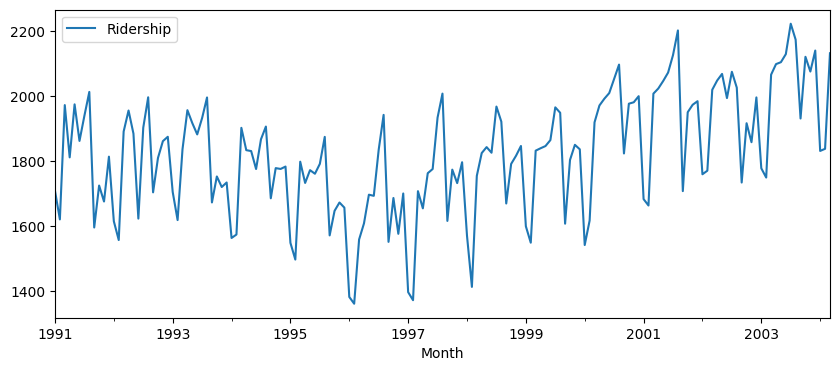

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


ridership_ts = pd.read_csv('/content/gdrive/MyDrive/Colab_Session/LSTM/Domain_knowledge/Amtrak.csv', parse_dates = True, index_col = 0, dayfirst = True)  ## 연월별 여객 철도 승객수 데이터
ridership_ts.plot(figsize=(10, 4))

In [145]:
df1 = ridership_ts.copy()
df1.head()

,Ridership
Month,
1991-01-01,1708.917
1991-02-01,1620.586
1991-03-01,1972.715
1991-04-01,1811.665
1991-05-01,1974.964


In [146]:
n_step = 3

# LSTM shape
n_lstm1 = 8
n_lstm2 = 8

# fully connected
n_hidden = 8
n_output = 1

n_epoch = 300

## Case 1. Basic

In [147]:
lstm1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((n_step, 1)),
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden, activation = 'relu'),
    tf.keras.layers.Dense(n_output)
])

lstm1.summary()

lstm1.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['mse'])

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 3, 8)           │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 945 (3.69 KB)

 Trainable params: 945 (3.69 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
from sklearn.preprocessing import MinMaxScaler

nValid = 36
nTrain = len(ridership_ts) - nValid

scaler1 = MinMaxScaler()

train_data1, train_label1, valid_data1, valid_label1 = dataset(df1, scaler1, n_step)

In [149]:
lstm1.fit(train_data1, train_label1, epochs = n_epoch)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2601 - mse: 0.2601
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2731 - mse: 0.2731
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2450 - mse: 0.2450
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2390 - mse: 0.2390
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2444 - mse: 0.2444
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2283 - mse: 0.2283
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2129 - mse: 0.2129
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2061 - mse: 0.2061
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1855 - mse: 0.1855
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1668 - mse: 0.1668
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1428 - mse: 0.1428
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1257 - mse: 0.1257
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/ste

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


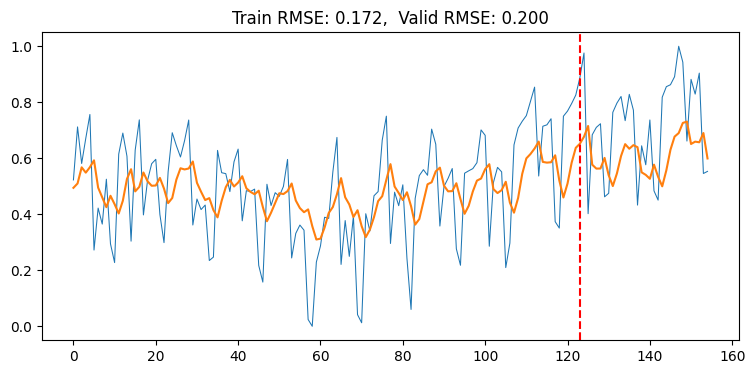

In [150]:
plot_graph(lstm1, train_data1, train_label1, valid_data1, valid_label1)

## Case 2. Basic + Plot shape

In [151]:
df2 = df1.copy()
df2['idx_square'] = np.arange(len(df2)) ** 2
df2.head()

,Ridership,idx_square
Month,,
1991-01-01,1708.917,0
1991-02-01,1620.586,1
1991-03-01,1972.715,4
1991-04-01,1811.665,9
1991-05-01,1974.964,16


In [152]:
lstm2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((n_step, 2)),
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden, activation = 'relu'),
    tf.keras.layers.Dense(n_output)
])

lstm2.summary()

lstm2.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['mse'])

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 3, 8)           │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 977 (3.82 KB)

 Trainable params: 977 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
scaler2 = MinMaxScaler()

train_data2, train_label2, valid_data2, valid_label2 = dataset(df2, scaler2, n_step)

In [154]:
lstm2.fit(train_data2, train_label2, epochs = n_epoch)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2421 - mse: 0.2421
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2200 - mse: 0.2200
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1812 - mse: 0.1812
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1419 - mse: 0.1419 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1355 - mse: 0.1355
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1030 - mse: 0.1030
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0980 - mse: 0.0980
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0711 - mse: 0.0711 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0627 - mse: 0.0627
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0554 - mse: 0.0554
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0423 - mse: 0.0423
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0380 - mse: 0.0380
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/s

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


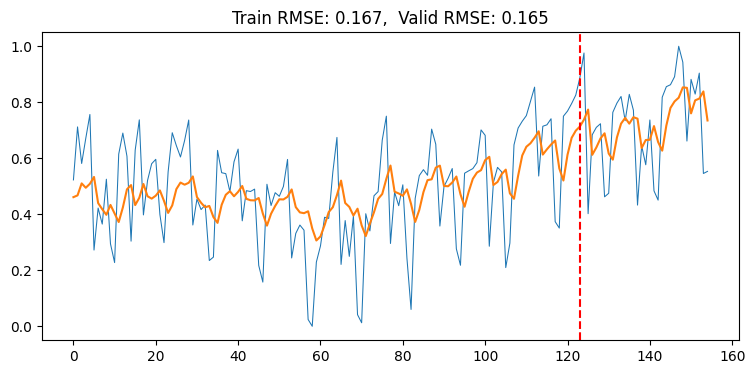

In [155]:
plot_graph(lstm2, train_data2, train_label2, valid_data2, valid_label2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


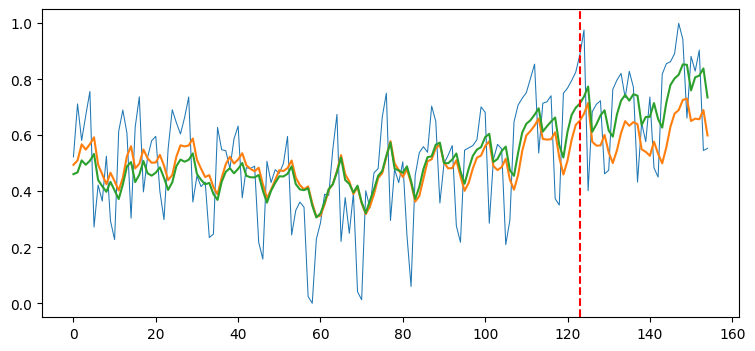

In [156]:
pred_train1 = lstm1.predict(train_data1).reshape(-1)
pred_valid1 = lstm1.predict(valid_data1).reshape(-1)

pred_train2 = lstm2.predict(train_data2).reshape(-1)
pred_valid2 = lstm2.predict(valid_data2).reshape(-1)

train_label_ = train_label2.reshape(-1)
valid_label_ = valid_label2.reshape(-1)

fig = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

plt.plot(np.hstack([train_label_, valid_label_]), color='C0', linewidth=0.75)
plt.plot(np.hstack([pred_train1, pred_valid1]), color = 'C1')
plt.plot(np.hstack([pred_train2, pred_valid2]), color = 'C2')

plt.axvline(x=len(train_label_), color='red', linestyle='--')

## Case 3. Basic + Plot shape + Season

In [157]:
df3 = df2.copy()
df3['month'] = df3.index.month.astype('str')
df3.head()

,Ridership,idx_square,month
Month,,,
1991-01-01,1708.917,0,1
1991-02-01,1620.586,1,2
1991-03-01,1972.715,4,3
1991-04-01,1811.665,9,4
1991-05-01,1974.964,16,5


In [158]:
df3 = pd.get_dummies(df3, dtype = 'int')  ## one-hot encoding
df3.head()

,Ridership,idx_square,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
Month,,,,,,,,,,,,,,
1991-01-01,1708.917,0,1,0,0,0,0,0,0,0,0,0,0,0
1991-02-01,1620.586,1,0,0,0,0,1,0,0,0,0,0,0,0
1991-03-01,1972.715,4,0,0,0,0,0,1,0,0,0,0,0,0
1991-04-01,1811.665,9,0,0,0,0,0,0,1,0,0,0,0,0
1991-05-01,1974.964,16,0,0,0,0,0,0,0,1,0,0,0,0


In [159]:
lstm3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((n_step, 14)),
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden, activation = 'relu'),
    tf.keras.layers.Dense(n_output)
])

lstm3.summary()

lstm3.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['mse'])

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 3, 8)           │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
scaler3 = MinMaxScaler()

train_data3, train_label3, valid_data3, valid_label3 = dataset(df3, scaler3, n_step)

In [161]:
lstm3.fit(train_data3, train_label3, epochs = n_epoch)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2658 - mse: 0.2658
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2482 - mse: 0.2482
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2174 - mse: 0.2174
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2016 - mse: 0.2016
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1863 - mse: 0.1863 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1706 - mse: 0.1706 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1513 - mse: 0.1513 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1374 - mse: 0.1374
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1122 - mse: 0.1122
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1079 - mse: 0.1079
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0881 - mse: 0.0881 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0740 - mse: 0.0740
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


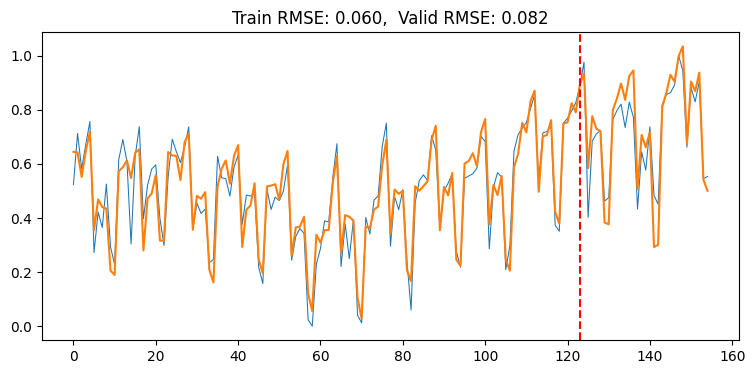

In [162]:
plot_graph(lstm3, train_data3, train_label3, valid_data3, valid_label3)